In [1]:
# !pip install wordcloud
# !pip install multidict

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [3]:
# Create wordcloud image for every words
fields = ['word',"total"]

## CHANGE FILE NAME!!!
text_all = pd.read_csv('prince_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['total']

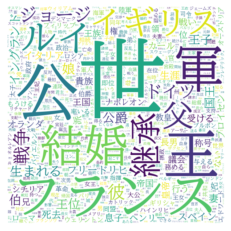

In [4]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_prince_all.png")


In [5]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("princeAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [6]:
# create wc for noun(名詞)
df = pd.read_csv('prince_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,total,articles
0,世,2470,305
1,公,1127,247
2,王,864,229
3,フランス,793,147
4,軍,762,127


In [7]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7230 entries, 0 to 8664
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      7230 non-null   object
 1   total     7230 non-null   int64 
 2   articles  7230 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 225.9+ KB


In [8]:
noun_dict = noun2.set_index("word").to_dict()['total']

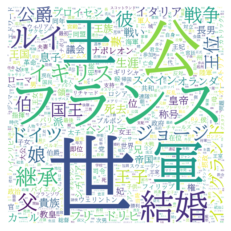

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("prince_noun.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("princeNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [11]:
# verb (動詞)
##CHANGE FILE NAME!!
df = pd.read_csv('prince_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,total,articles
14,生まれる,350,244
32,受ける,211,97
43,行う,176,82
58,務める,150,95
65,もうける,141,120


In [12]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 14 to 8663
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      1313 non-null   object
 1   total     1313 non-null   int64 
 2   articles  1313 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.0+ KB


In [13]:
verb_dict = verb2.set_index("word").to_dict()['total']

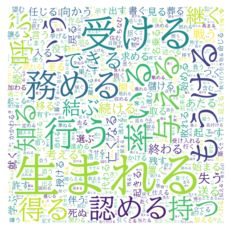

In [14]:
wc = WordCloud(background_color="white", \
               max_words=1500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("prince_verb.png")

In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("princeVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [16]:
# adj (形容詞)
df = pd.read_csv('prince_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,total,articles
41,ない,183,92
343,多い,38,22
367,強い,35,22
488,無い,27,21
489,大きい,27,16


In [17]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 41 to 8578
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      122 non-null    object
 1   total     122 non-null    int64 
 2   articles  122 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.8+ KB


In [18]:
adj_dict = adj2.set_index("word").to_dict()['total']

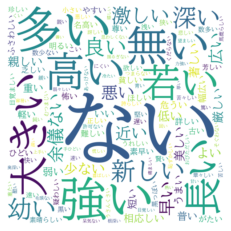

In [19]:
wc = WordCloud(background_color="white", \
               max_words=300, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("prince_adj.png")

In [20]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("princeAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)